**1.Bar Chart: Security Mentions by Language Learning Model (LLM)**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('rq2_analysis_temp_01_Anh.csv')

df['llama3_security_mention'] = pd.to_numeric(df['llama3_security_mention'], errors='coerce').fillna(0).astype(int)
df['claude3_security_mention'] = pd.to_numeric(df['claude3_security_mention'], errors='coerce').fillna(0).astype(int)
df['gpt4_security_mention'] = pd.to_numeric(df['gpt4_security_mention'], errors='coerce').fillna(0).astype(int)

llm_security_mentions = pd.DataFrame({
    'LLM': ['llama', 'claude', 'gpt'],
    'Security_Mentions': [
        df['llama3_security_mention'].sum(),
        df['claude3_security_mention'].sum(),
        df['gpt4_security_mention'].sum()
    ]
})

print(llm_security_mentions)


      LLM  Security_Mentions
0   llama                 31
1  claude                 21
2     gpt                 43


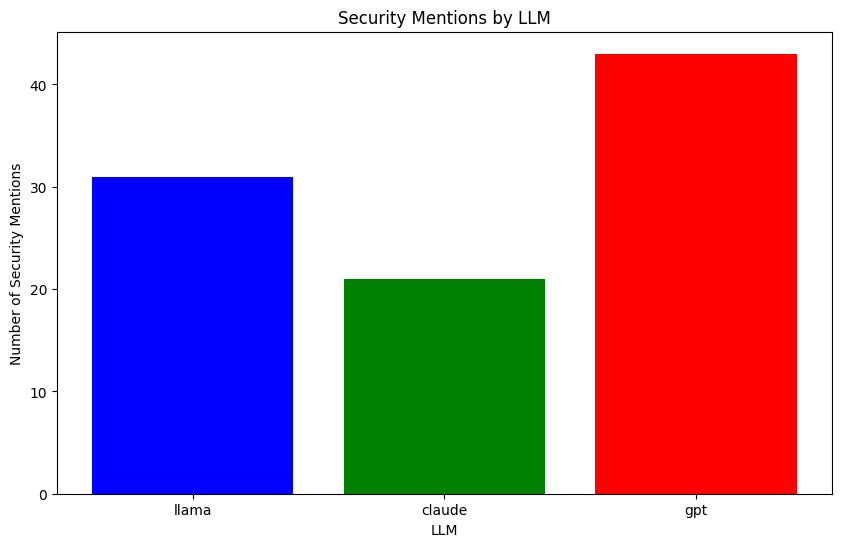

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(llm_security_mentions['LLM'], llm_security_mentions['Security_Mentions'], color=['blue', 'green', 'red'])
plt.xlabel('LLM')
plt.ylabel('Number of Security Mentions')
plt.title('Security Mentions by LLM')
plt.show()


**2.Stacked Bar Chart for Causes, Exploits, and Fixes**

In [31]:
df['llama3_causes'] = pd.to_numeric(df['llama3_causes'], errors='coerce').fillna(0).astype(int)
df['llama3_exploits'] = pd.to_numeric(df['llama3_exploits'], errors='coerce').fillna(0).astype(int)
df['llama3_fixes'] = pd.to_numeric(df['llama3_fixes'], errors='coerce').fillna(0).astype(int)
df['claude3_causes'] = pd.to_numeric(df['claude3_causes'], errors='coerce').fillna(0).astype(int)
df['claude3_exploits'] = pd.to_numeric(df['claude3_exploits'], errors='coerce').fillna(0).astype(int)
df['claude3_fixes'] = pd.to_numeric(df['claude3_fixes'], errors='coerce').fillna(0).astype(int)
df['gpt4_causes'] = pd.to_numeric(df['gpt4_causes'], errors='coerce').fillna(0).astype(int)
df['gpt4_exploits'] = pd.to_numeric(df['gpt4_exploits'], errors='coerce').fillna(0).astype(int)
df['gpt4_fixes'] = pd.to_numeric(df['gpt4_fixes'], errors='coerce').fillna(0).astype(int)

llm_mention_counts = pd.DataFrame({
    'LLM': ['llama', 'claude', 'gpt'],
    'Causes': [
        df['llama3_causes'].sum(),
        df['claude3_causes'].sum(),
        df['gpt4_causes'].sum()
    ],
    'Exploits': [
        df['llama3_exploits'].sum(),
        df['claude3_exploits'].sum(),
        df['gpt4_exploits'].sum()
    ],
    'Fixes': [
        df['llama3_fixes'].sum(),
        df['claude3_fixes'].sum(),
        df['gpt4_fixes'].sum()
    ]
})
print(llm_mention_counts)

      LLM  Causes  Exploits  Fixes
0   llama      30         9     27
1  claude      18         8     17
2     gpt      43        21     38


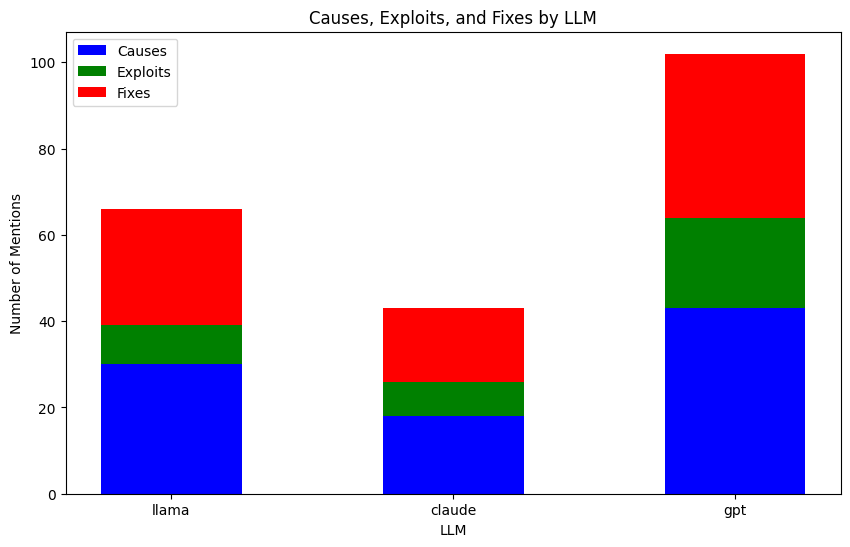

In [32]:

plt.figure(figsize=(10, 6))
bar_width = 0.5
bar_positions = range(len(llm_mention_counts['LLM']))

plt.bar(bar_positions, llm_mention_counts['Causes'], bar_width, label='Causes', color='blue')
plt.bar(bar_positions, llm_mention_counts['Exploits'], bar_width, bottom=llm_mention_counts['Causes'], label='Exploits', color='green')
plt.bar(bar_positions, llm_mention_counts['Fixes'], bar_width, bottom=llm_mention_counts['Causes'] + llm_mention_counts['Exploits'], label='Fixes', color='red')

plt.xlabel('LLM')
plt.ylabel('Number of Mentions')
plt.title('Causes, Exploits, and Fixes by LLM')
plt.xticks(bar_positions, llm_mention_counts['LLM'])
plt.legend()

plt.show()

**3.	Stacked Bar Chart for Causes, Exploits, and Fixes for LLM vs SO**

In [28]:
df = pd.read_csv('rq2_analysis_temp_01_Anh.csv')
df['causes'] = pd.to_numeric(df['causes'], errors='coerce').fillna(0).astype(int)
df['exploits'] = pd.to_numeric(df['exploits'], errors='coerce').fillna(0).astype(int)
df['fixes'] = pd.to_numeric(df['fixes'], errors='coerce').fillna(0).astype(int)
df['llama3_causes'] = pd.to_numeric(df['llama3_causes'], errors='coerce').fillna(0).astype(int)
df['llama3_exploits'] = pd.to_numeric(df['llama3_exploits'], errors='coerce').fillna(0).astype(int)
df['llama3_fixes'] = pd.to_numeric(df['llama3_fixes'], errors='coerce').fillna(0).astype(int)
df['claude3_causes'] = pd.to_numeric(df['claude3_causes'], errors='coerce').fillna(0).astype(int)
df['claude3_exploits'] = pd.to_numeric(df['claude3_exploits'], errors='coerce').fillna(0).astype(int)
df['claude3_fixes'] = pd.to_numeric(df['claude3_fixes'], errors='coerce').fillna(0).astype(int)
df['gpt4_causes'] = pd.to_numeric(df['gpt4_causes'], errors='coerce').fillna(0).astype(int)
df['gpt4_exploits'] = pd.to_numeric(df['gpt4_exploits'], errors='coerce').fillna(0).astype(int)
df['gpt4_fixes'] = pd.to_numeric(df['gpt4_fixes'], errors='coerce').fillna(0).astype(int)

source_counts = {
    'source': ['Stack Overflow', 'llama', 'claude', 'gpt'],
    'causes': [
        df['causes'].sum(),
        df['llama3_causes'].sum(),
        df['claude3_causes'].sum(),
        df['gpt4_causes'].sum()
    ],
    'exploits': [
        df['exploits'].sum(),
        df['llama3_exploits'].sum(),
        df['claude3_exploits'].sum(),
        df['gpt4_exploits'].sum()
    ],
    'fixes': [
        df['fixes'].sum(),
        df['llama3_fixes'].sum(),
        df['claude3_fixes'].sum(),
        df['gpt4_fixes'].sum()
    ]
}

source_counts_df = pd.DataFrame(source_counts)

source_counts_df['total'] = source_counts_df['causes'] + source_counts_df['exploits'] + source_counts_df['fixes']

source_counts_df['causes_percentage'] = (source_counts_df['causes'] / source_counts_df['total']) * 100
source_counts_df['exploits_percentage'] = (source_counts_df['exploits'] / source_counts_df['total']) * 100
source_counts_df['fixes_percentage'] = (source_counts_df['fixes'] / source_counts_df['total']) * 100

print(source_counts_df[['source', 'causes_percentage', 'exploits_percentage', 'fixes_percentage']])

           source  causes_percentage  exploits_percentage  fixes_percentage
0  Stack Overflow          43.846154            20.000000         36.153846
1           llama          45.454545            13.636364         40.909091
2          claude          41.860465            18.604651         39.534884
3             gpt          42.156863            20.588235         37.254902


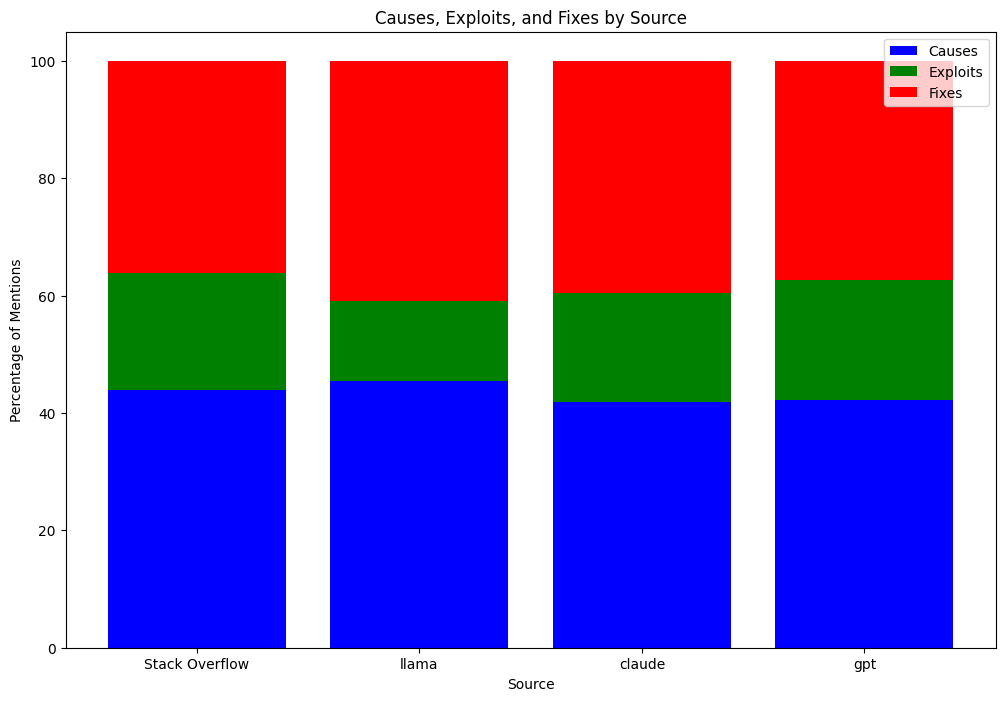

In [29]:

plt.figure(figsize=(12, 8))

bar_positions = range(len(source_counts_df['source']))

plt.bar(bar_positions, source_counts_df['causes_percentage'], label='Causes', color='blue')
plt.bar(bar_positions, source_counts_df['exploits_percentage'], bottom=source_counts_df['causes_percentage'], label='Exploits', color='green')
plt.bar(bar_positions, source_counts_df['fixes_percentage'], bottom=source_counts_df['causes_percentage'] + source_counts_df['exploits_percentage'], label='Fixes', color='red')

plt.xlabel('Source')
plt.ylabel('Percentage of Mentions')
plt.title('Causes, Exploits, and Fixes by Source')
plt.xticks(bar_positions, source_counts_df['source'])
plt.legend()

plt.show()

**4.	Heatmap of Security Mentions by CWE and LLM**

In [64]:
df = pd.read_csv('rq2_analysis_with_mention_150_results_full.csv')

df['llama3_security_mention'] = pd.to_numeric(df['llama3_security_mention'], errors='coerce').fillna(0).astype(int)
df['claude3_security_mention'] = pd.to_numeric(df['claude3_security_mention'], errors='coerce').fillna(0).astype(int)
df['gpt4_security_mention'] = pd.to_numeric(df['gpt4_security_mention'], errors='coerce').fillna(0).astype(int)


df['tags'] = df['tags'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
df = df.explode('tags')

# get cwe 
df['tags'] = df['tags'].apply(lambda x: x if 'cwe' in x else None)
df = df.dropna(subset=['tags'])

# get cwe tag
df['CWE'] = df['tags'].apply(lambda x: x.split('/')[-1])

# group by CWE and sum the security mentions
heatmap_data = df.groupby('CWE')[['llama3_security_mention', 'claude3_security_mention', 'gpt4_security_mention']].sum()
print(heatmap_data)


          llama3_security_mention  claude3_security_mention  \
CWE                                                           
cwe-020                         1                         2   
cwe-022                         0                         0   
cwe-023                         0                         0   
cwe-036                         0                         0   
cwe-073                         0                         0   
cwe-079                         5                         4   
cwe-080                         0                         0   
cwe-089                         1                         0   
cwe-090                         1                         0   
cwe-094                         2                         2   
cwe-095                         2                         2   
cwe-099                         0                         0   
cwe-1004                        0                         0   
cwe-116                         5                      

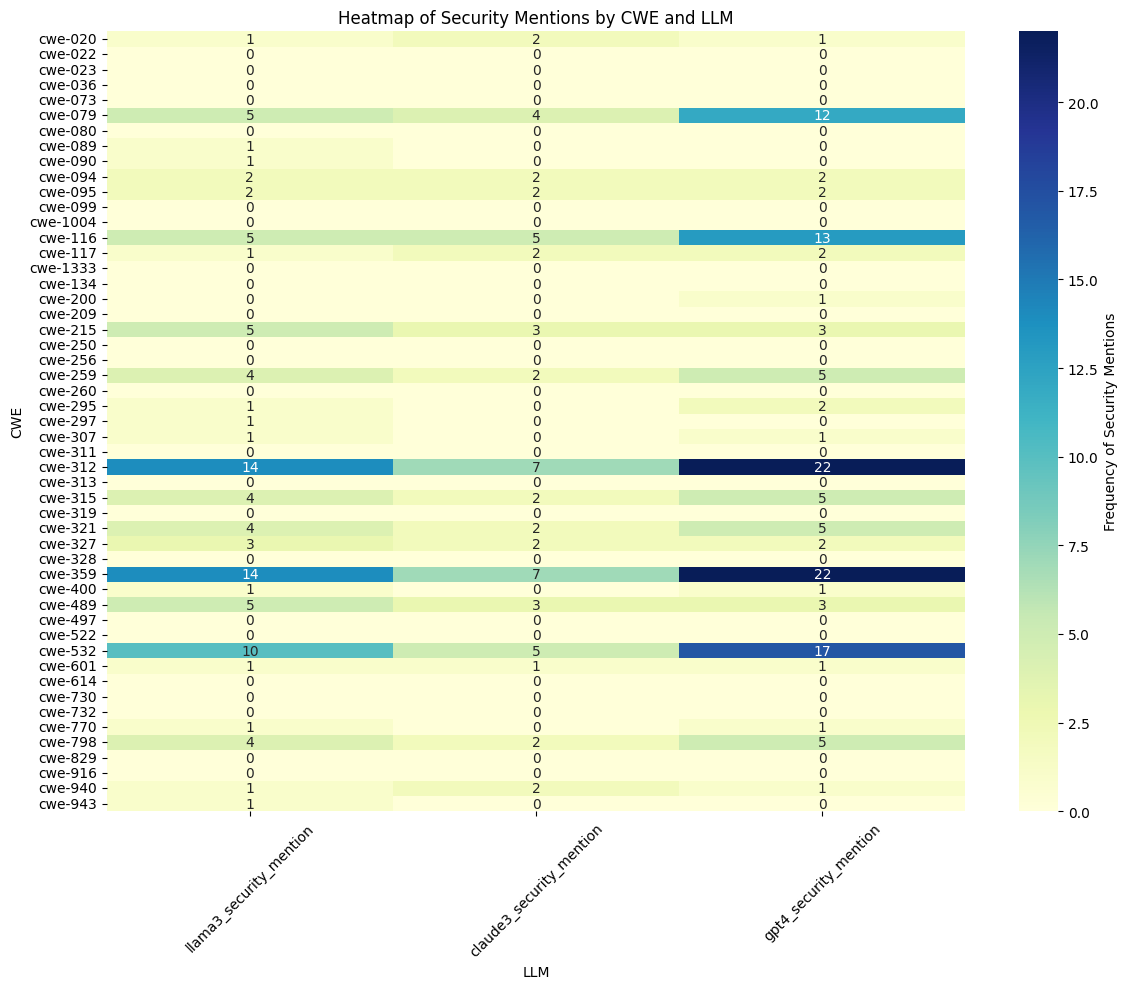

In [63]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Frequency of Security Mentions'})

# Customize the plot
plt.title('Heatmap of Security Mentions by CWE and LLM')
plt.xlabel('LLM')
plt.ylabel('CWE')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()